<a href="https://colab.research.google.com/github/vani9306/EDA_using_Python/blob/master/covid_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analysis on the Spread of Covid-19 in India**
Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization

The number of new cases are increasing day by day around the world. This dataset has information from the states and union territories of India at daily level.

### **Acknowledgements**

Thanks to Indian Ministry of Health & Family Welfare for making the data available to general public.

Thanks to covid19india.org for making the individual level details and testing details available to general public.

Thanks to Wikipedia for population information.

Photo Courtesy - https://hgis.uw.edu/virus/

In [1]:
#importing the required libraraies
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the required dataset
covid19_india = pd.read_csv('https://docs.google.com/spreadsheets/d/1ueJfrhUijOB1OaV5oUgkyC53ZynpB9X3aL1JCBO1pN0/export?format=csv&gid=0',
                            na_values=['-'])
covid19_india.shape

(4071, 9)

In [3]:
covid19_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1.0,0.0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1.0,0.0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2.0,0.0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3.0,0.0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3.0,0.0,0,0,3


In [4]:
#renaming only for the ease of name retrival during the analysis
covid19_india.rename(columns={'State/UnionTerritory':'State'},inplace=True)

In [6]:
#checking the dataset for Null Values
covid19_india.isnull().sum()/len(covid19_india.index)

Sno                         0.000000
Date                        0.000000
Time                        0.000000
State                       0.000000
ConfirmedIndianNational     0.890445
ConfirmedForeignNational    0.890445
Cured                       0.000000
Deaths                      0.000000
Confirmed                   0.000000
dtype: float64

In [7]:
#removing the fields having higher % of null values
covid19_india = covid19_india.drop(labels=['ConfirmedIndianNational','ConfirmedForeignNational'],axis=1)

In [8]:
#converting the date field using pd.to_datetime for more insightful analysis
covid19_india['Date'] = pd.to_datetime(covid19_india['Date'],dayfirst=True)
covid19_india.Date.head()

0   2020-01-30
1   2020-01-31
2   2020-02-01
3   2020-02-02
4   2020-02-03
Name: Date, dtype: datetime64[ns]

In [9]:
covid19_india['month_int'] = covid19_india.Date.dt.month
covid19_india['month'] = covid19_india.Date.dt.strftime('%b')
covid19_india['day'] = covid19_india.Date.dt.day

In [10]:
#verifying the changes
covid19_india.head()

,Sno,Date,Time,State,Cured,Deaths,Confirmed,month_int,month,day
0,1,2020-01-30,6:00 PM,Kerala,0,0,1,1,Jan,30
1,2,2020-01-31,6:00 PM,Kerala,0,0,1,1,Jan,31
2,3,2020-02-01,6:00 PM,Kerala,0,0,2,2,Feb,1
3,4,2020-02-02,6:00 PM,Kerala,0,0,3,2,Feb,2
4,5,2020-02-03,6:00 PM,Kerala,0,0,3,2,Feb,3


In [11]:
covid19_india.month.value_counts()

Jun    1081
May    1044
Apr     949
Mar     498
Jul     468
Feb      29
Jan       2
Name: month, dtype: int64

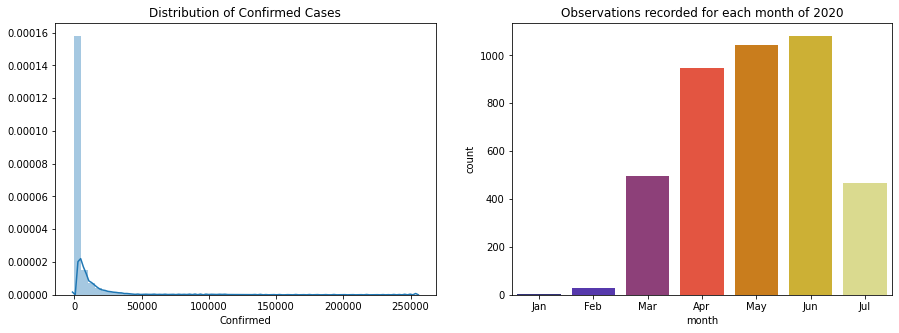

In [ ]:
#plotting the ditrution and month-wise recoreded cases
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(covid19_india.Confirmed)
plt.title("Distribution of Confirmed Cases")

plt.subplot(1,2,2)
sns.countplot(covid19_india.month,palette='CMRmap')
plt.title("Observations recorded for each month of 2020")
plt.show()

### Cleaning up the attribute, 'State' present in the dataframe

In [12]:
print("Unique number of State information available:",covid19_india.State.nunique())
covid19_india.State.unique()

Unique number of State information available: 40


array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana'],
      dtype=object)

In [13]:
covid19_india['State'] = covid19_india.State.str.replace('Telengana','Telangana')
covid19_india['State'] = covid19_india.State.str.replace('Daman & Diu','Dadra and Nagar Haveli and Daman and Diu')
covid19_india['State'] = covid19_india.State.str.replace('Dadar Nagar Haveli','Dadra and Nagar Haveli and Daman and Diu')
covid19_india['State'] = covid19_india.State.str.replace('Cases being reassigned to states','Unassigned')

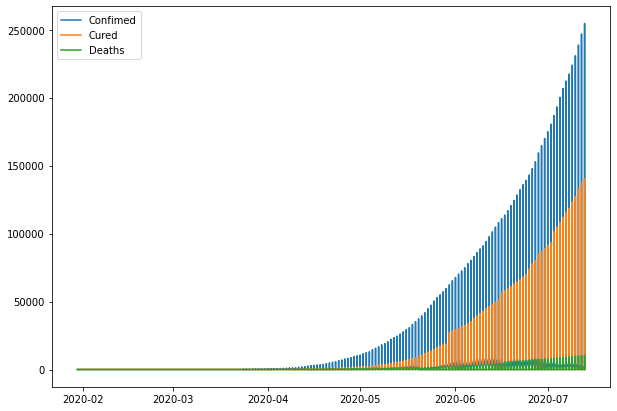

In [14]:
#plotting the confimed, cured and deaths recorded
plt.figure(figsize=(10,7))
plt.plot(covid19_india.Date,covid19_india.Confirmed)
plt.plot(covid19_india.Date,covid19_india.Cured)
plt.plot(covid19_india.Date,covid19_india.Deaths)
plt.legend(['Confimed','Cured','Deaths'])
plt.show()

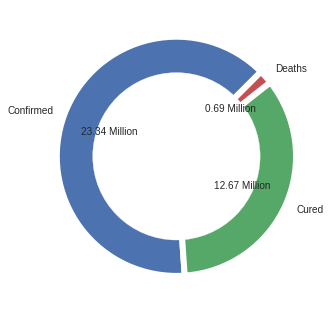

In [ ]:
#pie plot representation of the cases conformed, cured and the number of casualities
cases = [covid19_india.Confirmed.sum(),covid19_india.Cured.sum(),covid19_india.Deaths.sum()]
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(cases,labels=['Confirmed','Cured','Deaths'],autopct=lambda v:'{:.2f} Million'.format(v*sum(cases)/1e8) ,
        startangle=45,wedgeprops = { 'linewidth':6, 'edgecolor':'white'})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [15]:
def region_analysis(region):
  '''
  Input: the function takes in the input as one of the 7 regions specified as below:
  North, South, Central, East, West, North-East and Union Territories
  Output: for the specified region, the function outputs state-wise count of the confirmed, cured and death cased reported,
          and highlights the state where the maximum cases are recorded.
          The function also outputs the respective graphical representation of the said region
  '''
  
  if region.upper() == 'NORTH':
    north = covid19_india.State.isin(['Himachal Pradesh','Haryana','Punjab','Rajasthan','Uttar Pradesh','Uttarakhand'])
    reg = covid19_india[north]
  if region.upper() == 'SOUTH':
    south = covid19_india.State.isin(['Andhra Pradesh','Karnataka','Kerala','Tamil Nadu','Telangana'])
    reg = covid19_india[south]
  if region.upper() == 'CENTRAL':
    central = covid19_india.State.isin(['Chhattisgarh','Madhya Pradesh'])
    reg = covid19_india[central]
  if region.upper() == 'EAST':
    east = covid19_india.State.isin(['Bihar','Jharkhand','Odisha','West Bengal'])
    reg = covid19_india[east]
  if region.upper() == 'WEST':
    west = covid19_india.State.isin(['Goa','Gujarat','Maharashtra'])
    reg = covid19_india[west]
  if region.upper() == 'NORTH-EAST':
    ne = covid19_india.State.isin(['Arunachal Pradesh','Assam','Manipur','Meghalaya','Mizoram','Nagaland','Sikkim','Tripura'])
    reg = covid19_india[ne]
  if region.upper() == 'UNION TERRITORIES':
    ut = covid19_india.State.isin(['Andaman and Nicobar Islands','Chandigarh','Dadra and Nagar Haveli and Daman and Diu','Delhi',
                        'Jammu and Kashmir','Ladakh','Puducherry'])
    reg = covid19_india[ut]
  
  sample = reg
  print("Month-wise analysis on the recored cases:")
  
  cured = sample.groupby(['State','month'],as_index=False).sum().eval('Cured_Rate=Cured/Confirmed')
  death = sample.groupby(['State','month'],as_index=False).sum().eval('Death_Rate=Deaths/Confirmed')
  cured['Cured_Rate'] = cured.Cured_Rate.mul(100).round(2).astype('str')+'%'
  death['Death_Rate'] = death.Death_Rate.mul(100).round(2).astype('str')+'%'

  cured= cured[['State','month','Cured','Confirmed','Cured_Rate']]
  death= death[['State','month','Deaths','Confirmed','Death_Rate']]

  rate = cured.merge(death,how='inner',on=['State','month','Confirmed'])
  rate = rate[['State','month','Confirmed','Cured','Cured_Rate','Deaths','Death_Rate']]

  months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
  rate['month'] = pd.Categorical(rate['month'], categories=months, ordered=True)
  rate = rate.sort_values(by=['State','month'])
  rate = rate.reset_index(drop=True)
  
  def highlight_max_c(s):
    if s.Confirmed == int(rate.Confirmed.max()):
        return ['background-color: yellow']*7
    else:
        return ['background-color: white']*7
 
  display(rate.style.hide_index().apply(highlight_max_c, axis=1))

  plt.figure(figsize=(20,7))
  plt.subplot(2,2,1)
  sns.barplot(y='State',x='Confirmed',data=sample,color='navy',ci=None)
  sns.barplot(y='State',x='Cured',data=sample,color='mediumseagreen',ci=None)
  sns.barplot(y='State',x='Deaths',data=sample,color='crimson',ci=None)
  plt.xlabel('')
  plt.title('State-Wise Confirmed, Cured and Deaths')
  plt.legend(['Confirmed','Cured','Deaths'])

  plt.subplot(2,2,2)
  sns.barplot(y='month',x='Confirmed',data=sample,color='navy',ci=None)
  sns.barplot(y='month',x='Cured',data=sample,color='mediumseagreen',ci=None)
  sns.barplot(y='month',x='Deaths',data=sample,color='crimson',ci=None)
  plt.xlabel('')
  plt.title('Total Confimed vs Cured vs Death')
  plt.legend(['Confirmed','Cured','Deaths'])


  plt.subplot(2,2,3)
  #sns.scatterplot(sample.Cured,sample.Confirmed,hue=sample.month,palette='summer_r')
  sns.lineplot(x='Cured',y='Confirmed',hue='month',style='month',palette='cubehelix_r', 
               data=sample,ci=None,markers=True,dashes=False)

  plt.subplot(2,2,4)
  #sns.scatterplot(sample.Deaths,sample.Confirmed, hue=sample.month,palette='autumn_r')
  sns.lineplot(x='Deaths',y='Confirmed',hue='month',style='month',palette='flag_r', 
               data=sample,ci=None,markers=True,dashes=False)

  plt.show()

  print("Observations recorded from the {}ern region is:".format(region),sample.shape[0])
  print("In Total, the confirmed cases in the {}ern region is:".format(region),sample.Confirmed.sum())
  print("Among which there are records of",sample.Cured.sum(),"Cured cases with",sample.Deaths.sum(),"cases of casualities,")
  print("Leading to a Recovery Rate of {:.2%}".format(sample.Cured.sum()/sample.Confirmed.sum()),"and Death Rate of {:.2%}".format(sample.Deaths.sum()/sample.Confirmed.sum()))

In [16]:
def state_analysis(state):
  '''
  Input: the function takes in the input as one of legally recognized state or union territories.
  Output: for the specified state, the function outputs the count of the confirmed, cured and death cased reported,
          and highlights the state where the maximum cases are recorded.
          The function also outputs the respective graphical representation of the said state
  '''

  sample = covid19_india.loc[covid19_india.State.str.upper()==state.upper()]
  print("Month-wise analysis on the recored cases in {}:".format(state))
  cured = sample.groupby('month',as_index=False).sum().eval('Cured_Rate=Cured/Confirmed')
  death = sample.groupby('month',as_index=False).sum().eval('Death_Rate=Deaths/Confirmed')
  cured['Cured_Rate'] = cured.Cured_Rate.mul(100).round(2).astype('str')+'%'
  death['Death_Rate'] = death.Death_Rate.mul(100).round(2).astype('str')+'%'
  cured= cured[['month','Cured','Confirmed','Cured_Rate']]
  death= death[['month','Deaths','Confirmed','Death_Rate']]

  rate = cured.merge(death,how='inner',on=['month','Confirmed'])
  rate = rate[['month','Confirmed','Cured_Rate','Death_Rate']]
  rate = rate.sort_values(by='Confirmed')
  rate = rate.reset_index(drop=True)

  def highlight_max_c(s):
    if s.Confirmed == int(rate.Confirmed.max()):
        return ['background-color: yellow']*4
    else:
        return ['background-color: white']*4
  display(rate.style.hide_index().apply(highlight_max_c, axis=1))
  
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  sns.barplot(y='month',x='Confirmed',data=sample,color='navy',ci=None)
  sns.barplot(y='month',x='Cured',data=sample,color='mediumseagreen',ci=None)
  sns.barplot(y='month',x='Deaths',data=sample,color='crimson',ci=None)
  plt.legend(['Confirmed','Cured','Deaths'])
  plt.xlabel('')
  plt.title('Total Confimed vs Cured vs Death')

  plt.subplot(1,3,2)
  #sns.scatterplot(sample.Cured,sample.Confirmed,hue=sample.month,palette='summer_r')
  sns.lineplot(x='Cured',y='Confirmed',hue='month',style='month',palette='summer_r', data=sample,ci=None,markers=True,dashes=False)
  
  plt.title('Confirmed vs Cured per month')

  plt.subplot(1,3,3)
  #sns.scatterplot(sample.Deaths,sample.Confirmed, hue=sample.month,palette='autumn_r')
  sns.lineplot(x='Deaths',y='Confirmed',hue='month',style='month',palette='autumn_r', data=sample,ci=None,markers=True,dashes=False)
  plt.title('Confirmed vs Deaths per month')

  plt.show()

  print("Observations recorded in",state,':',sample.shape[0])
  print("In Total, the confirmed cases in the state of",state, "is:",sample.Confirmed.sum())
  print("Among which there are records of",sample.Cured.sum(),"Cured cases with",sample.Deaths.sum(),"cases of casualities,")
  print("Leading to a Recovery Rate of {:.2%}".format(sample.Cured.sum()/sample.Confirmed.sum()),"and Death Rate of {:.2%}".format(sample.Deaths.sum()/sample.Confirmed.sum()))

### Region-wise Analysis

Month-wise analysis on the recored cases:


State,month,Confirmed,Cured,Cured_Rate,Deaths,Death_Rate
Arunachal Pradesh,Apr,28,10,35.71%,0,0.0%
Arunachal Pradesh,May,41,31,75.61%,0,0.0%
Arunachal Pradesh,Jun,2826,438,15.5%,5,0.18%
Arunachal Pradesh,Jul,3531,1232,34.89%,20,0.57%
Assam,Apr,901,272,30.19%,20,2.22%
Assam,May,7697,1582,20.55%,77,1.0%
Assam,Jun,123711,66333,53.62%,209,0.17%
Assam,Jul,155808,100127,64.26%,241,0.15%
Manipur,Mar,8,0,0.0%,0,0.0%
Manipur,Apr,58,33,56.9%,0,0.0%


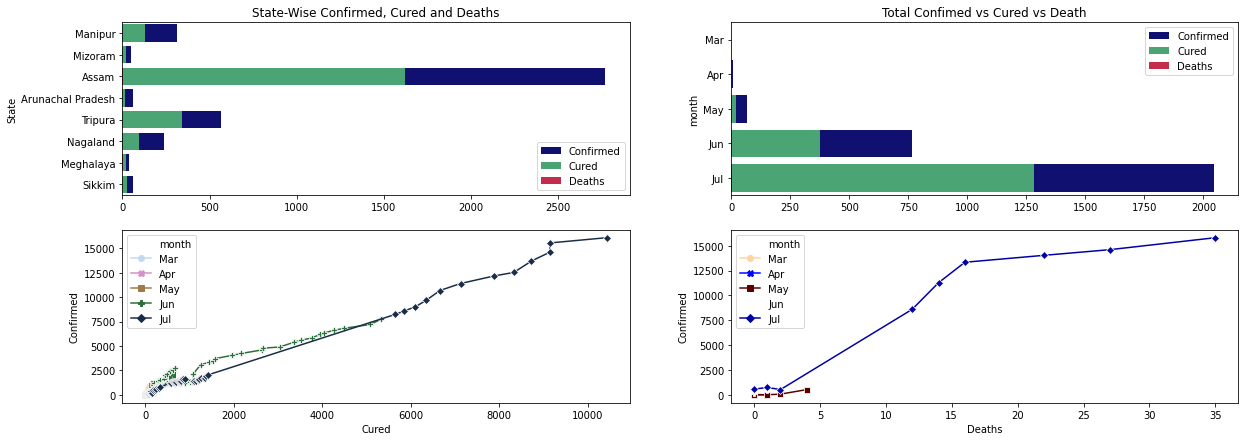

Observations recorded from the north-eastern region is: 727
In Total, the confirmed cases in the north-eastern region is: 411002
Among which there are records of 228904 Cured cases with 702 cases of casualities,
Leading to a Recovery Rate of 55.69% and Death Rate of 0.17%


In [17]:
#analysis on the north-eastern region
region_analysis('north-east')

Month-wise analysis on the recored cases:


State,month,Confirmed,Cured,Cured_Rate,Deaths,Death_Rate
Haryana,Mar,486,112,23.05%,0,0.0%
Haryana,Apr,5756,2368,41.14%,72,1.25%
Haryana,May,27870,15852,56.88%,365,1.31%
Haryana,Jun,233245,122815,52.65%,3175,1.36%
Haryana,Jul,229872,170259,74.07%,3519,1.53%
Himachal Pradesh,Mar,30,0,0.0%,8,26.67%
Himachal Pradesh,Apr,855,351,41.05%,30,3.51%
Himachal Pradesh,May,3614,1533,42.42%,85,2.35%
Himachal Pradesh,Jun,17248,9899,57.39%,206,1.19%
Himachal Pradesh,Jul,14055,9882,70.31%,139,0.99%


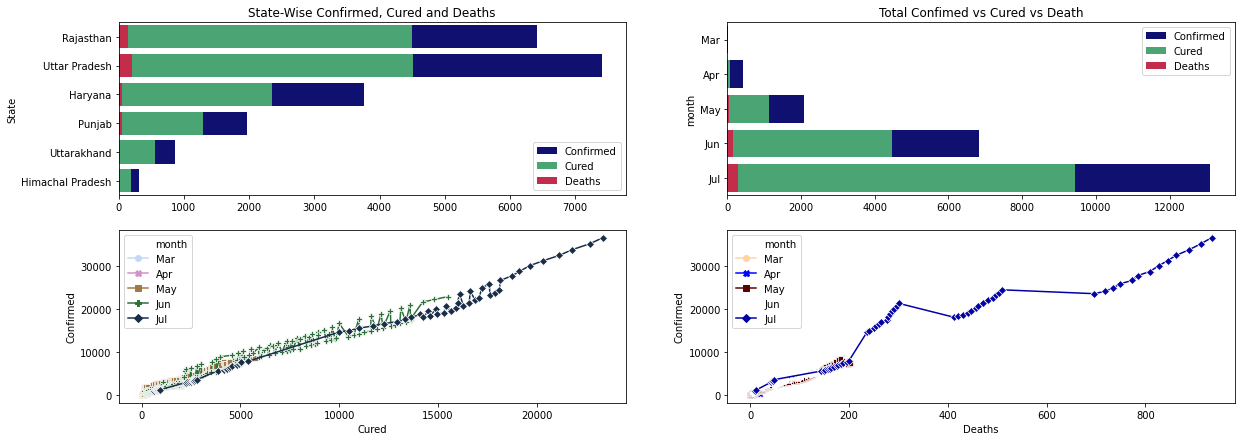

Observations recorded from the northern region is: 760
In Total, the confirmed cases in the northern region is: 2718032
Among which there are records of 1760760 Cured cases with 60910 cases of casualities,
Leading to a Recovery Rate of 64.78% and Death Rate of 2.24%


In [18]:
#analysis on the northern region
region_analysis('north')

Month-wise analysis on the recored cases:


State,month,Confirmed,Cured,Cured_Rate,Deaths,Death_Rate
Goa,Mar,24,0,0.0%,0,0.0%
Goa,Apr,205,122,59.51%,0,0.0%
Goa,May,944,409,43.33%,0,0.0%
Goa,Jun,17368,4409,25.39%,16,0.09%
Goa,Jul,24089,13454,55.85%,95,0.39%
Gujarat,Mar,461,5,1.08%,30,6.51%
Gujarat,Apr,40555,3767,9.29%,1821,4.49%
Gujarat,May,319907,127945,39.99%,19128,5.98%
Gujarat,Jun,719385,501968,69.78%,43978,6.11%
Gujarat,Jul,480330,342516,71.31%,25408,5.29%


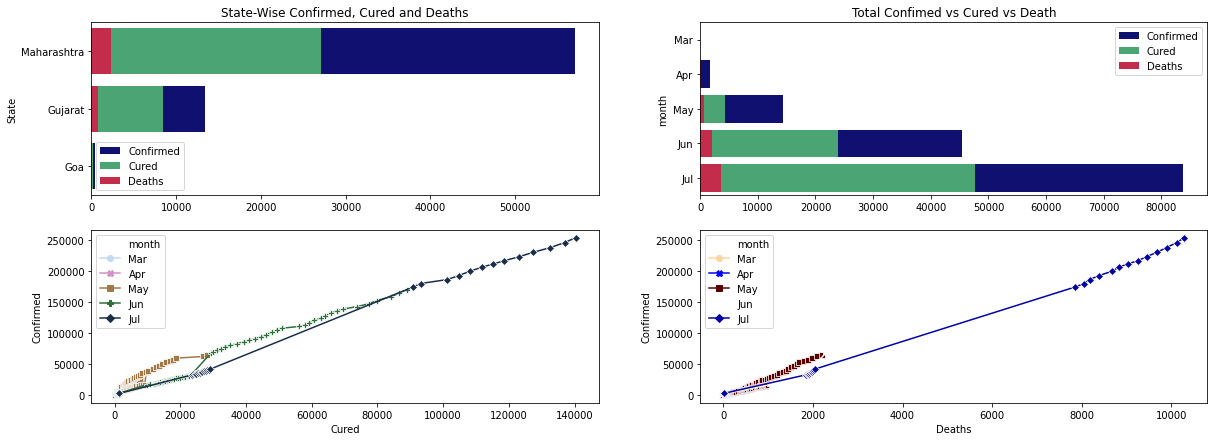

Observations recorded from the western region is: 353
In Total, the confirmed cases in the western region is: 8844822
Among which there are records of 4437174 Cured cases with 390702 cases of casualities,
Leading to a Recovery Rate of 50.17% and Death Rate of 4.42%


In [19]:
#analysis on the western region
region_analysis('west')

Month-wise analysis on the recored cases:


State,month,Confirmed,Cured,Cured_Rate,Deaths,Death_Rate
Bihar,Mar,73,0,0.0%,10,13.7%
Bihar,Apr,3537,796,22.5%,43,1.22%
Bihar,May,45653,15985,35.01%,259,0.57%
Bihar,Jun,195475,128180,65.57%,1246,0.64%
Bihar,Jul,163711,119261,72.85%,1294,0.79%
Jharkhand,Apr,1036,106,10.23%,48,4.63%
Jharkhand,May,7538,3179,42.17%,103,1.37%
Jharkhand,Jun,48964,29230,59.7%,269,0.55%
Jharkhand,Jul,38783,27204,70.14%,259,0.67%
Odisha,Mar,32,0,0.0%,0,0.0%


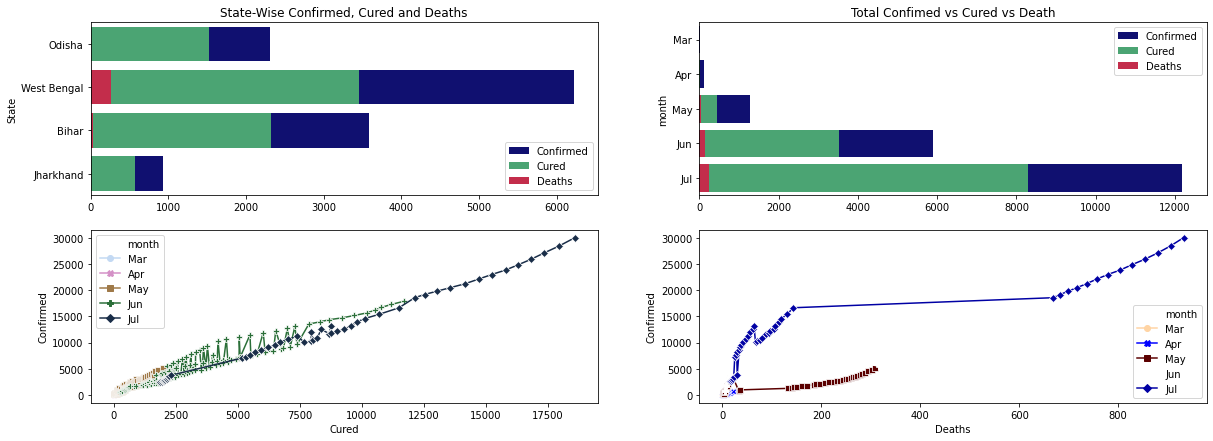

Observations recorded from the eastern region is: 456
In Total, the confirmed cases in the eastern region is: 1514426
Among which there are records of 913098 Cured cases with 35822 cases of casualities,
Leading to a Recovery Rate of 60.29% and Death Rate of 2.37%


In [20]:
#analysis on the eastern region
region_analysis('east')

Month-wise analysis on the recored cases:


State,month,Confirmed,Cured,Cured_Rate,Deaths,Death_Rate
Andhra Pradesh,Mar,163,7,4.29%,0,0.0%
Andhra Pradesh,Apr,18113,2325,12.84%,427,2.36%
Andhra Pradesh,May,72785,40137,55.14%,1469,2.02%
Andhra Pradesh,Jun,216404,109430,50.57%,2911,1.35%
Andhra Pradesh,Jul,268388,129793,48.36%,3195,1.19%
Karnataka,Mar,647,36,5.56%,28,4.33%
Karnataka,Apr,9382,2603,27.74%,332,3.54%
Karnataka,May,41184,15907,38.62%,1103,2.68%
Karnataka,Jun,225375,123411,54.76%,3181,1.41%
Karnataka,Jul,335096,142506,42.53%,5384,1.61%


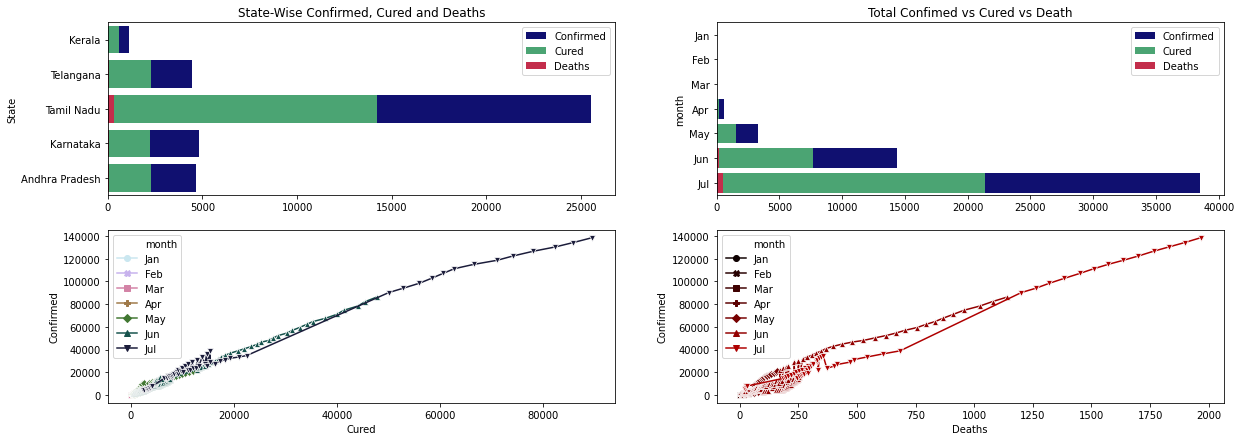

Observations recorded from the southern region is: 680
In Total, the confirmed cases in the southern region is: 5262973
Among which there are records of 2808978 Cured cases with 69443 cases of casualities,
Leading to a Recovery Rate of 53.37% and Death Rate of 1.32%


In [21]:
#analysis on the sourthern region
region_analysis('south')

Month-wise analysis on the recored cases:


State,month,Confirmed,Cured,Cured_Rate,Deaths,Death_Rate
Andaman and Nicobar Islands,Mar,36,0,0.0%,0,0.0%
Andaman and Nicobar Islands,Apr,485,211,43.51%,0,0.0%
Andaman and Nicobar Islands,May,1023,969,94.72%,0,0.0%
Andaman and Nicobar Islands,Jun,1352,1075,79.51%,0,0.0%
Andaman and Nicobar Islands,Jul,1736,930,53.57%,0,0.0%
Chandigarh,Mar,79,0,0.0%,0,0.0%
Chandigarh,Apr,735,266,36.19%,0,0.0%
Chandigarh,May,5745,2458,42.79%,73,1.27%
Chandigarh,Jun,10781,8609,79.85%,163,1.51%
Chandigarh,Jul,6391,5148,80.55%,85,1.33%


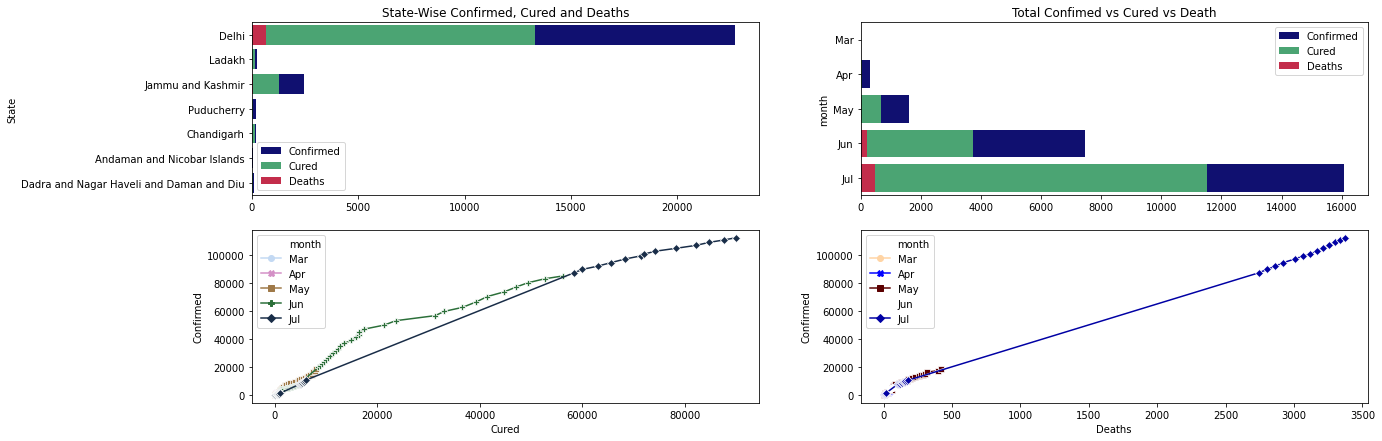

Observations recorded from the Union Territoriesern region is: 805
In Total, the confirmed cases in the Union Territoriesern region is: 3439205
Among which there are records of 1995514 Cured cases with 96733 cases of casualities,
Leading to a Recovery Rate of 58.02% and Death Rate of 2.81%


In [22]:
#analysis of the Union Territories
region_analysis('Union Territories')

### State-wise Analysis

Month-wise analysis on the recored cases in karnataka:


month,Confirmed,Cured_Rate,Death_Rate
Mar,647,5.56%,4.33%
Apr,9382,27.74%,3.54%
May,41184,38.62%,2.68%
Jun,225375,54.76%,1.41%
Jul,335096,42.53%,1.61%


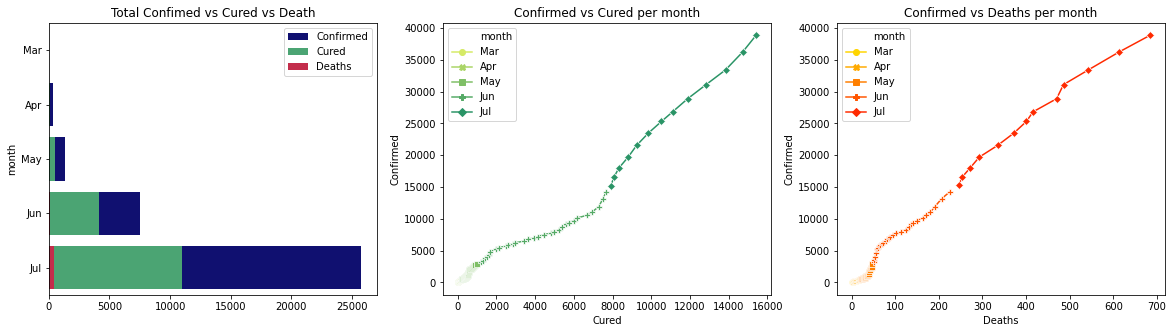

Observations recorded in karnataka : 127
In Total, the confirmed cases in the state of karnataka is: 611684
Among which there are records of 284463 Cured cases with 10028 cases of casualities,
Leading to a Recovery Rate of 46.50% and Death Rate of 1.64%


In [23]:
state_analysis('karnataka')

Month-wise analysis on the recored cases in Maharashtra:


month,Confirmed,Cured_Rate,Death_Rate
Mar,1747,7.5%,2.8%
Apr,107038,13.03%,5.0%
May,1014118,27.49%,3.54%
Jul,2764277,54.41%,4.26%
Jun,3354374,49.06%,4.21%


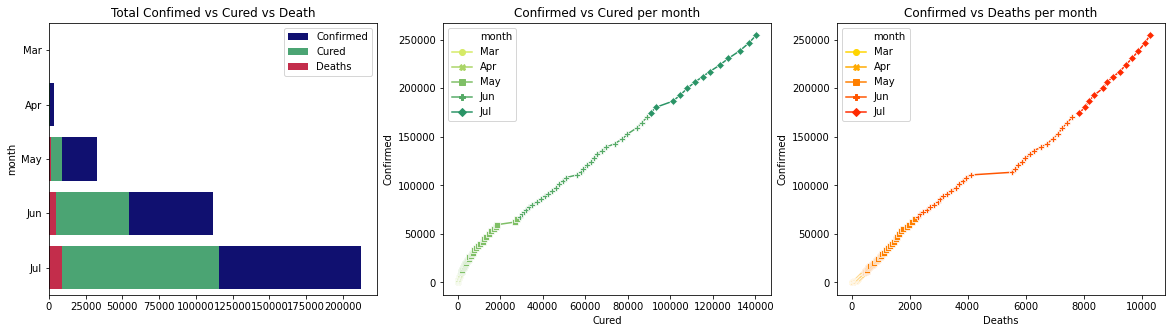

Observations recorded in Maharashtra : 127
In Total, the confirmed cases in the state of Maharashtra is: 7241554
Among which there are records of 3442579 Cured cases with 300226 cases of casualities,
Leading to a Recovery Rate of 47.54% and Death Rate of 4.15%


In [24]:
state_analysis('Maharashtra')

Month-wise analysis on the recored cases in Tamil Nadu:


month,Confirmed,Cured_Rate,Death_Rate
Mar,354,6.5%,1.69%
Apr,35186,30.05%,1.09%
May,327826,43.25%,0.71%
Jun,1440113,55.04%,1.12%
Jul,1488941,59.68%,1.38%


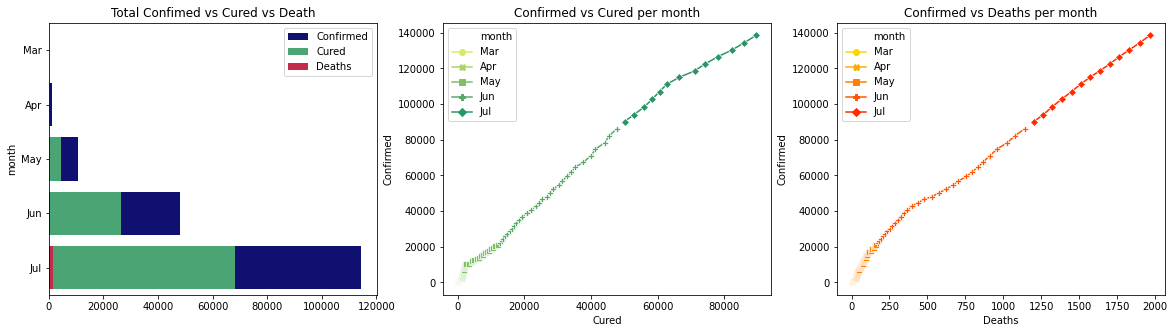

Observations recorded in Tamil Nadu : 129
In Total, the confirmed cases in the state of Tamil Nadu is: 3292420
Among which there are records of 1833528 Cured cases with 39372 cases of casualities,
Leading to a Recovery Rate of 55.69% and Death Rate of 1.20%


In [25]:
state_analysis('Tamil Nadu')

### Age Group Analysis

In [27]:
url = 'https://docs.google.com/spreadsheets/d/1NOzBgcGYxkyiMtMNHggp2zMxdlpiH9NkdAzJbbL9VvI/export?format=csv&gid=0'

age_grp_df = pd.read_csv(url)

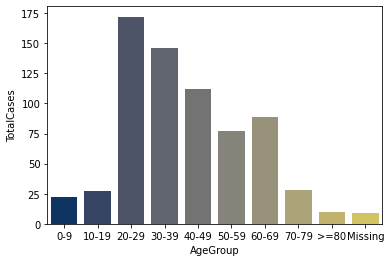

In [28]:
sns.barplot(x='AgeGroup', y='TotalCases',data=age_grp_df,palette='cividis')

As per the data reoreded, the most affected age group seems to be in the range of 20-29